<h1> Create Simple Graph

In [9]:
from typing import Dict, Any, TypedDict
from langgraph.graph import Graph, StateGraph

In [14]:
# Create an agent greeting function

class AgentState(TypedDict):
    message: str


def greeting_node(state: AgentState) -> AgentState:
    """ Simple greeting node for the agent. """
    state['message'] = "Hello! " + state['message'] + " How can I assist you today?"
    
    return state

In [15]:
graph = StateGraph(AgentState) # Create a state graph with the defined state type

graph.add_node("greeter", greeting_node) # Two arguments: node name and function

graph.set_entry_point("greeter") # Set the entry point of the graph use the node name
graph.set_finish_point("greeter") # Set the finish point of the graph use the node name

app = graph.compile() # Compile the graph

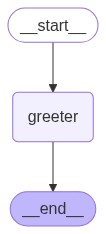

In [12]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [17]:
result = app.invoke({"message": "Prada,"})

In [18]:
result['message']

'Hello! Prada, How can I assist you today?'

# Exercise 1
 create a Personalized Compliment Agent using LangGraph!
  
 `Hint: You have to concanate the state, not replace it`

In [20]:
class ComplimentState(TypedDict):
    message: str
    
def compliment_node(state: ComplimentState) -> ComplimentState:
    """ Simple compliment node for the agent. """
    state['message'] = state['message'] + " You are doing a great job!"
    
    return state


In [21]:
graph = StateGraph(ComplimentState) # Create a state graph with the defined state type

graph.add_node("compliment", compliment_node) # Two arguments: node name and function
graph.set_entry_point("compliment") # Set the entry point of the graph use the node name
graph.set_finish_point("compliment") # Set the finish point of the graph use the node name

app = graph.compile() # Compile the graph

In [22]:
result = app.invoke({"message": "Prada,"})
result['message']

'Prada, You are doing a great job!'